In [1]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#load dataset in pandas
df= pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Tajikistan_dataset.csv")

In [3]:
#check dataset
df.head()

,Year,GPI,GDP,No of country,Density,Population
0,1992,NaN,53,1,39.3,3000
1,1993,NaN,122,1,40.0,300
2,1994,NaN,148,1,40.6,695
3,1995,NaN,100,1,41.2,620
4,1996,NaN,183,4,41.8,1166


In [4]:
df.describe()

,Year,GPI,GDP,No of country,Density,Population
count,25.000000,6.000000,25.000000,25.000000,25.000000,25.000000
mean,2004.000000,2.245167,450.640000,3.440000,49.164000,3218.040000
std,7.359801,0.099863,341.719656,1.474223,7.247291,3806.592543
min,1992.000000,2.124000,53.000000,1.000000,39.300000,300.000000
25%,1998.000000,2.170250,177.000000,3.000000,43.000000,1166.000000
50%,2004.000000,2.253500,304.000000,3.000000,48.000000,2174.000000
75%,2010.000000,2.290250,741.000000,4.000000,54.600000,3306.000000
max,2016.000000,2.395000,1113.000000,6.000000,62.900000,15364.000000


In [5]:
#fill column with missing values
df['GPI'].fillna(mean(df.GPI),inplace=True)

In [6]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year             0
GPI              0
GDP              0
No of country    0
Density          0
Population       0
dtype: int64

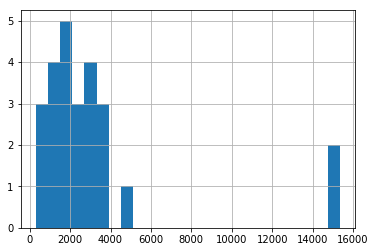

In [7]:
#check population histogram
df['Population'].hist(bins=25)

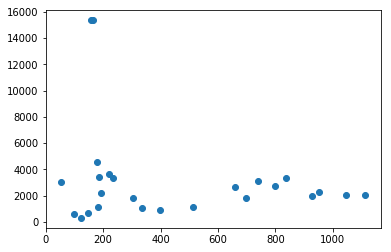

In [8]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

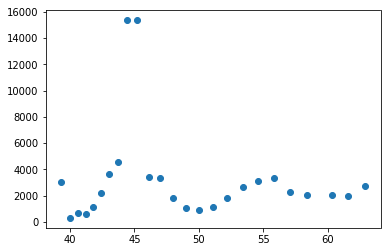

In [9]:
#check relationship between Density and Population
plt.scatter(df['Density'], df['Population'])
plt.show() 

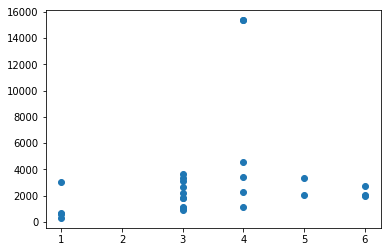

In [10]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

In [11]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  4299.73725004
Coefficient:  [-2.40035782]
R squared value:  0.0464321839041


In [12]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  6633.76056723
Coefficient:  [-69.47605092]
R squared value:  0.0174964088235


In [13]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  1345.45858896
Coefficient:  [ 544.35506135]
R squared value:  0.0444445063248


In [14]:
#check GPI and Population linear relationship
feature_cols = ['GPI']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  3812.92733035
Coefficient:  [-264.96355001]
R squared value:  1.00661916244e-05


In [15]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  1524.20507774
MAE Score:  1150.85693818
MSE Score:  2323201.11899
R squared value:  0.287856740955


In [16]:
# include all variables to build a model
X = df[['GDP','Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  1538.26502392
MAE Score:  1244.32125105
MSE Score:  2366259.28381
R squared value:  0.284935075436


In [17]:
# include all variables to build a model
X = df[['GDP', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  1435.47745769
MAE Score:  1197.45512364
MSE Score:  2060595.53153
R squared value:  0.285028490765


In [18]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.857145063327
Predicted GDP for year:  2017 [[ 1001.66980749]]
Predicted GDP for year:  2018 [[ 1043.86053123]]
Predicted GDP for year:  2019 [[ 1086.05125498]]
Predicted GDP for year:  2020 [[ 1128.24197872]]
Predicted GDP for year:  2021 [[ 1170.43270246]]
Predicted GDP for year:  2022 [[ 1212.6234262]]


array([[ 959.47908375]])

In [19]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['No of country']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted No of country for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.59202026294
Predicted No of country for year:  2017 [[ 5.42019052]]
Predicted No of country for year:  2018 [[ 5.56714684]]
Predicted No of country for year:  2019 [[ 5.71410316]]
Predicted No of country for year:  2020 [[ 5.86105948]]
Predicted No of country for year:  2021 [[ 6.0080158]]
Predicted No of country for year:  2022 [[ 6.15497212]]


array([[ 5.2732342]])

In [20]:
# Forecasted Population of Kazakhstan
X = df[['GDP','No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)


var_2017 = [[1001.66980749,5.42019052]]
var_2018 = [[1043.86053123,5.56714684]]
var_2019 = [[1086.05125498,5.71410316]]                               
var_2020 = [[1128.24197872,5.86105948]]
var_2021 = [[1170.43270246,6.0080158]]
var_2022 = [[1212.6234262,6.15497212]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))



Predicted Population for year 2017:  [ 2210.39994686]
Predicted Population for year 2018:  [ 2124.12148234]
Predicted Population for year 2019:  [ 2037.84301773]
Predicted Population for year 2020:  [ 1951.56455321]
Predicted Population for year 2021:  [ 1865.28608869]
Predicted Population for year 2022:  [ 1779.00762417]


In [21]:
lm2.predict([[959.47908375,5.2732342]])

array([ 2296.67841138])